# Assignment 3 (Clustering with K-means), a23emisn & a23petny

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

import joblib as jb

from sklearn.cluster import KMeans

In [2]:
# 1. Load the wine dataset

In [3]:
wine = datasets.load_wine()

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
# 2. Create the dataset that we can use for unsupervised learning, that means without the target data.

In [6]:
X = wine.data

In [7]:
# 3. Create a data frame for that data (the dataset without the labels (targets).

In [8]:
df = pd.DataFrame(X, columns = wine.feature_names)
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [9]:
# 4. Visualize the dataset and investigate: How many clusters would you suspect be suitable for this dataset just by looking at the visualization?

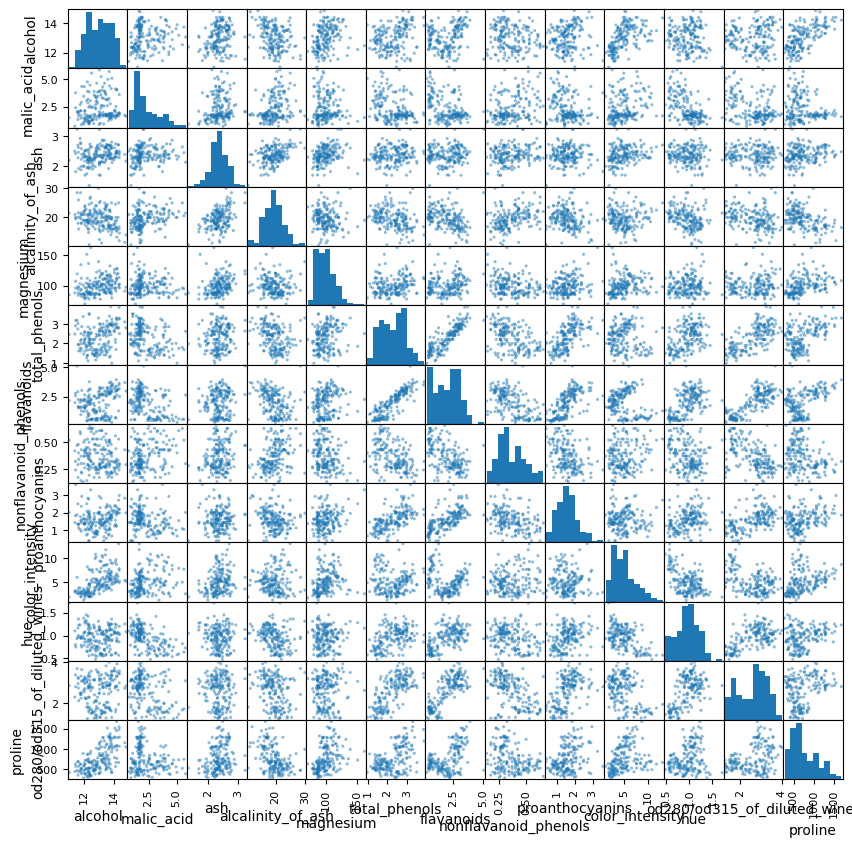

In [10]:
visual = pd.plotting.scatter_matrix(df, figsize = [10,10], s = 20)

From looking at the visualization alone, it's hard to tell how many clusters that might be in the dataset. The scatter plots do not contain any clearly distinguishable clusters of data. The only slight There are some vague indications of two separate clusters, especially for the malic_acid and  flavanoids features.

In [11]:
# 5. Use the describe function and investigate: What features in the dataset might be of more or less importance for the clustering? Explain why?

In [12]:
df.describe() 

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

Looking at the describe() output, we can see that features have very different scales and ranges. For example:
- **proline** has a mean of ~747 and ranges from 278 to 1680
- **magnesium** has a mean of ~100 and ranges from 70 to 162
- **hue** has a mean of ~0.96 and ranges from 0.48 to 1.71
- **nonflavanoid_phenols** has a mean of ~0.36 and ranges from 0.13 to 0.66

Since K-means clustering uses Euclidean distance to assign data points to clusters, features with larger numerical ranges (like proline and magnesium) will **dominate** the clustering algorithm. The distance contribution from proline (which varies by ~1400 units) will vastly outweigh the contribution from hue (which varies by ~1.2 units). This means features like proline will be more important for clustering simply because of their scale, not necessarily because they are more meaningful for distinguishing wine types. This is why normalization is important before clustering.

In [13]:
# 6. Use the Elbow method to identify a suitable number of clusters

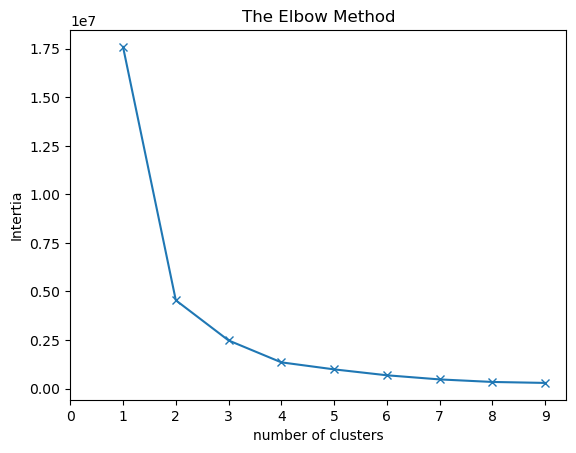

In [14]:
inta = [np.mean([KMeans(n_clusters = i).fit(X).inertia_ for _ in range(10)]) for i in range(1,10)]
plt.plot(range(1,10),inta, marker='x')
plt.xlabel('number of clusters')
plt.xticks(np.arange(10))
plt.ylabel('Intertia')
plt.title('The Elbow Method')
plt.show()

In [15]:
# 6.1 What number of clusters would you suggest based on the Elbow method?

The "elbow" seems to sit a ~3 clusters. We start so see the steep decline taper off at 2 clusters, but then at 3 it really starts to level and more clusters do not further decrease the inertia.

In [16]:
# 6.2 Motivate that answer

By looking at the graph, we start to see a diminishing of returns at 2-3 clusters. This suggests that more clusters than this do not explain the variance in the dataset well enough to pay off. At 3 clusters, the decrease starts leveling off.

In [17]:
# 7. Normalize the dataset

In [18]:
normalized_X = preprocessing.normalize(X)

In [19]:
# 8. Explain what normalization does

In [20]:
# 8.1 In general

The `preprocessing.normalize()` function scales each **sample (row)** individually so that it has unit norm (L2 norm = 1). This means each data point is projected onto a unit hypersphere. This is different from standardization (like StandardScaler), which scales features to have zero mean and unit variance, or MinMaxScaler which scales features to a range like [0, 1].

Normalization is useful when the direction of the data matters more than the magnitude, and it helps ensure that no single feature dominates the distance calculations simply because it has larger values.

In [21]:
# 8.2 How would you expect this to influence the k-means clustering algorithm?

Since the ranges of the dataset features are different for each feature, the normalization will help to adjust this. In doing this we can mitigate the risk that larger ranges dominate and skew our model, making clusters harder to identify.

In [22]:
# 9. Visualize the normalized data and investigate: How many clusters would you suspect be suitable for this normalized dataset just by looking at the visualization?

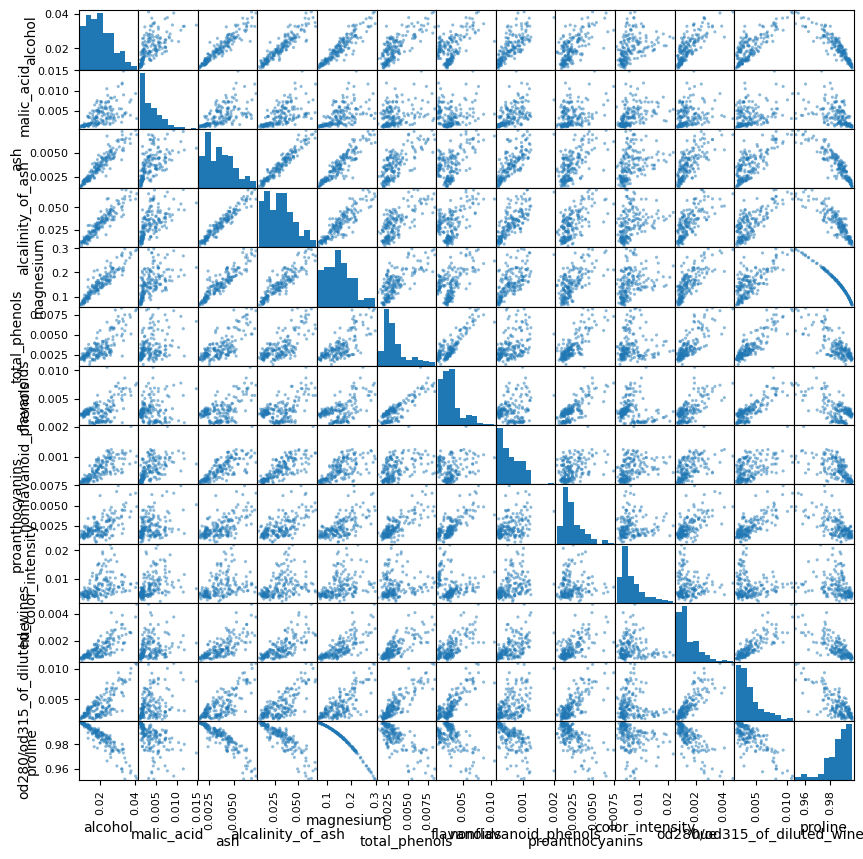

In [23]:
normalized_df = pd.DataFrame(normalized_X, columns = wine['feature_names'])
visual_norm = pd.plotting.scatter_matrix(normalized_df, figsize = [10,10], s = 20)

After normalization, the scatter plots look quite different. Looking at the visualizations without any cluster coloring, we can observe:
- The data appears more spread out and the relationships between features look different
- There are some indications of 2-3 potential clusters in several feature combinations (e.g., flavanoids vs total_phenols, alcohol vs proline)
- Some scatter plots show what could be two main groupings with a possible third smaller group

Based on visual inspection alone, 2-3 clusters seem reasonable for this normalized dataset.

In [24]:
#10. Use the describe function and investigate: What features in the dataset might be of more or less importance for the clustering? Explain why? 

In [25]:
normalized_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.019950    0.003711    0.003644           0.031124    0.151541   
std      0.007321    0.002499    0.001409           0.014671    0.054081   
min      0.008428    0.000944    0.001473           0.007739    0.064147   
25%      0.013548    0.001684    0.002359           0.017615    0.109775   
50%      0.018984    0.003174    0.003468           0.030036    0.146777   
75%      0.024783    0.004981    0.004506           0.040010    0.183082   
max      0.041106    0.014852    0.007305           0.069703    0.297958   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.003444    0.002973              0.000581         0.002396   
std         0.001543    0.001802              0.000327         0.001249   
min         0.001255    0.000637              0.000145         0.000554   
25%         0.002385    0.001746              0.000277         0.001515   
50%         0.002946    0.002721              0.000514         0.002030   
75%         0.003886    0.003551              0.000833         0.003040   
max         0.008404    0.010560              0.002008         0.007469   

       color_intensity         hue  od280/od315_of_diluted_wines     proline  
count       178.000000  178.000000                    178.000000  178.000000  
mean          0.007342    0.001477                      0.003993    0.986018  
std           0.003843    0.000736                      0.001979    0.010073  
min           0.002241    0.000579                      0.001675    0.951812  
25%           0.004612    0.000970                      0.002535    0.981687  
50%           0.005981    0.001232                      0.003384    0.988441  
75%           0.008853    0.001834                      0.004870    0.993564  
max           0.021876    0.004727                      0.010858    0.997835

After normalization, looking at the describe() output, we can see that all features now have much more comparable scales. The proline feature, which previously dominated with values up to 1680, now has a mean of ~0.986 and ranges roughly from 0.95 to 1.0. Similarly, all other features now have values in similar ranges (mostly between 0 and 0.3).

This means that after normalization, no single feature should dominate the K-means clustering based purely on its numerical scale. All features will contribute more equally to the distance calculations, allowing the algorithm to find clusters based on the actual patterns in the data rather than being skewed by features with larger ranges.

In [26]:
#11. Use the Elbow method to identify a suitable number of clusters

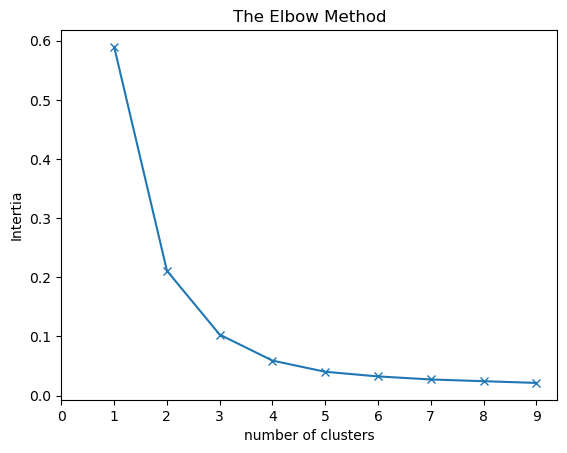

In [27]:
inta = [np.mean([KMeans(n_clusters = i).fit(normalized_X).inertia_ for _ in range(10)]) for i in range(1,10)]
plt.plot(range(1,10),inta, marker='x')
plt.xlabel('number of clusters')
plt.xticks(np.arange(10))
plt.ylabel('Intertia')
plt.title('The Elbow Method')
plt.show()

In [28]:
# 11.1 What number of clusters would you suggest based on the Elbow method?

3 clusters

In [29]:
# 11.2 Motivate that answer

Looking at the Elbow plot for the normalized data, there is a clear decrease in inertia from 1 to 2 clusters, and still notable improvement from 2 to 3 clusters. After 3 clusters, the curve starts to flatten out significantly, indicating diminishing returns. The "elbow" appears to be at 3 clusters, which is where we see the transition from steep decline to a more gradual decrease in inertia.

In [30]:
# 12. Present the number of clusters that you would settle for 
# (taking both, your investigation for the original and the normalized dataset into account) and motivate your answer.

We settle on **3 clusters**. Both the original and normalized Elbow plots suggest that 3 clusters is a reasonable choice:
- For the original data, the elbow appeared around 3 clusters
- For the normalized data, the elbow is also clearly visible at 3 clusters

Additionally, since we know the wine dataset originally has 3 classes (from 3 different wineries), choosing 3 clusters allows us to meaningfully compare our unsupervised clustering results with the original classification. This doesn't mean we're cheating by using prior knowledge - both the visual inspection and Elbow method independently point to 3 as a suitable number.

In [31]:
# 13. Build two more cluster models: model_3 and modle_3N, with 3 clusters each and based on the original and the normalized dataset respectively.

In [32]:
model_3, model_3N = [KMeans(n_clusters = 3).fit(i) for i in [X, normalized_X]]

In [33]:
# 14. Compare the clustering of wine by their chemical features with the original classification by winery (the original target values in the dataset).

Clustering with model_3 (original data):


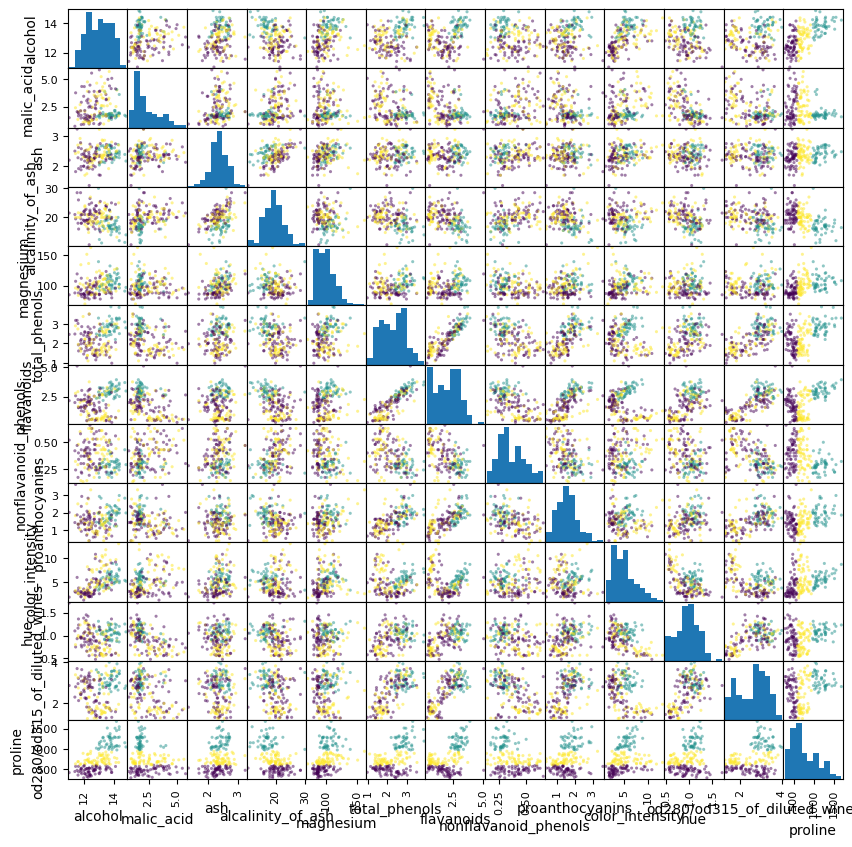


Clustering with model_3N (normalized data):


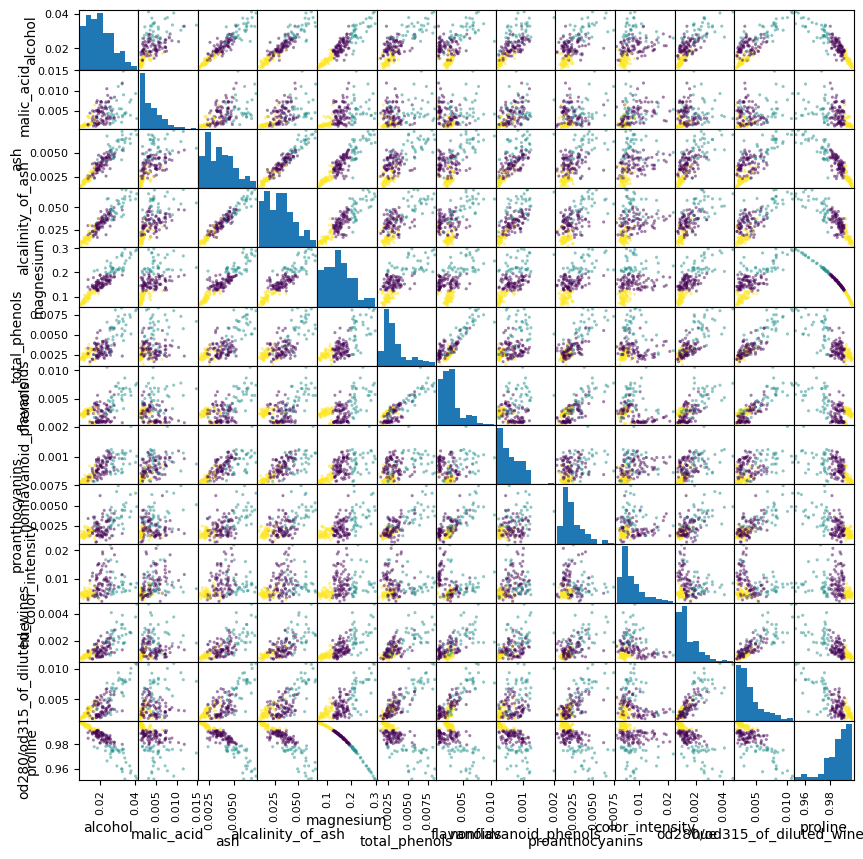

In [34]:
# Visualize clustering results using the actual models
print("Clustering with model_3 (original data):")
pd.plotting.scatter_matrix(df, figsize=[10,10], c=model_3.labels_, s=20)
plt.show()

print("\nClustering with model_3N (normalized data):")
pd.plotting.scatter_matrix(normalized_df, figsize=[10,10], c=model_3N.labels_, s=20)
plt.show()

Original target labels (winery classification):


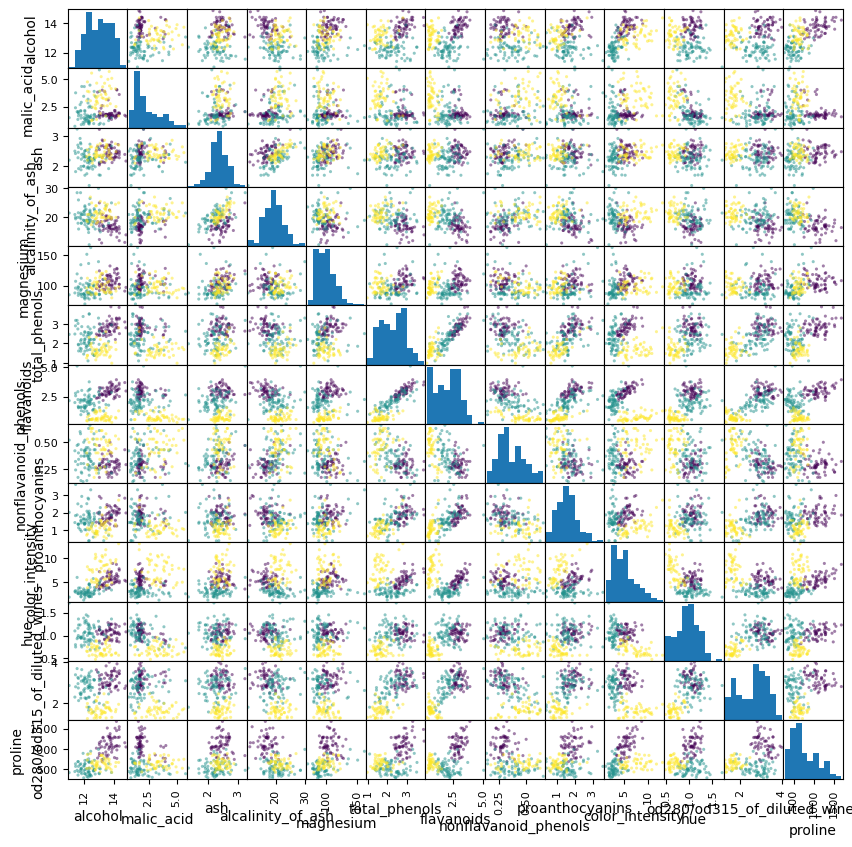

In [35]:
# Visualize the original target labels (winery classification)
print("Original target labels (winery classification):")
pd.plotting.scatter_matrix(df, figsize=[10,10], c=wine['target'], s=20)
plt.show()

In [36]:
# Note: We don't use accuracy_score here because cluster labels are arbitrary
# (cluster 0 in K-means might correspond to class 2 in the original labels)
# Instead, we use crosstab analysis below to properly compare the clustering

**Important Note:** We cannot use simple accuracy_score to compare K-means clustering with the original labels because cluster numbers are assigned arbitrarily by the algorithm. For example, K-means might label the first group as "cluster 0" while the original dataset calls it "class 2". The clusters might be perfectly correct, but accuracy would appear low due to this label mismatch.

The crosstab analysis below is the proper way to compare clustering results with original classifications.

In [37]:
# 15. You can use the crosstab for this analysis. (Be aware of e.g. randomness in the algorithms and how this will affect what you see in the crosstab.)
#Describe your findings carefully.

In [38]:
pd.crosstab(wine['target'], model_3N.labels_, rownames=['labels'], colnames=['prediction'])

prediction   0   1   2
labels                
0            8   0  51
1           33  33   5
2           40   4   4

In [39]:
pd.crosstab(wine['target'], model_3.labels_, rownames=['labels'], colnames=['prediction'])

prediction   0   1   2
labels                
0            0  46  13
1           50   1  20
2           19   0  29

### Analysis of Crosstab Results

**For model_3 (original, non-normalized data):**
Looking at the crosstab, we can see how K-means clusters correspond to the original winery labels. Remember that cluster numbers (0, 1, 2) are arbitrary and may not match the original label numbers.

The crosstab shows that:
- Some original wine classes are mostly grouped into single clusters, indicating good clustering
- However, there is mixing between classes, showing that the clustering based on chemical features doesn't perfectly match the winery classification
- The non-normalized model is heavily influenced by features with large scales (like proline)

**For model_3N (normalized data):**
The normalized model shows a different clustering pattern:
- Normalization changes which wines are grouped together because all features now contribute equally
- Some classes may be better separated, while others might be more mixed
- This demonstrates that the choice of preprocessing affects clustering results

**Key Findings:**
1. **Cluster labels are arbitrary**: Due to random initialization, running K-means multiple times may assign different cluster numbers to the same groups. This is why we compare using crosstab rather than accuracy.

2. **Chemical clustering vs. winery classification**: The clustering based on chemical properties does not perfectly match the original winery classification. This suggests that while wines from the same winery may share some chemical characteristics, there is overlap between wineries.

3. **Effect of normalization**: The normalized and non-normalized models produce different clusterings, highlighting the importance of preprocessing when features have different scales.

4. **Practical interpretation**: If each row in the crosstab had all its values concentrated in a single column, that would indicate perfect agreement between chemical clustering and winery classification. The spread of values across columns shows the degree of mismatch.